In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
import umap

reducer = umap.UMAP(n_components=20,min_dist=0,n_neighbors=20)

d:\anaconda3\envs\aiastro\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

# 定义初始颜色
sns.color_palette("Spectral", as_cmap=True)
def combine_data(path):
    file_name = []
    dataset = []
    class_len = []
    for file in os.listdir(path):
        if file.endswith("_data.npy"):
            file_name.append(file)
    for file_path in [os.path.join(path, file) for file in file_name]:
        data = np.load(file_path)
        data = np.nan_to_num(data, nan=np.nanmedian(data))
        class_len.append(data.shape[0])
        dataset.append(data)
    
    class_name = [file.split("_")[0] for file in file_name]
    dataset = np.concatenate(dataset, axis=0)
    #scal
    dataset = StandardScaler().fit_transform(dataset)    
    return dataset, class_name, class_len 

combine_data, class_name, class_len = combine_data("../npy_data/")
print(combine_data.shape)
print(class_name)
print(class_len)

index = np.cumsum(class_len)
print(index)


def scatter_data_2d(data,class_name,index):
    fig , ax = plt.subplots(figsize=(12,10),dpi = 300)
    
    for i in range(len(index)):
        color = sns.color_palette("Spectral", as_cmap=True)(i/len(index))
        if i == 0:
            sc = ax.scatter(data[:index[i],0],data[:index[i],1],
                            label=class_name[i],s=0.5,color=color)
        else:
            ax.scatter(data[index[i-1]:index[i],0],data[index[i-1]:index[i],1],
                       label=class_name[i],s=0.5, color=color)
    ax.legend()
    plt.show()


(19661, 143)
['A', 'CV', 'C', 'DPV', 'ELL', 'MIRA', 'M', 'NC', 'OSARG', 'RRAB', 'RRC', 'RRD', 'RRE', 'SRV', 'S', 'T110', 'T120', 'T1F', 'T1M', 'T2']
[89, 18, 1237, 137, 1360, 1500, 78, 800, 1500, 1500, 1500, 1335, 1378, 1500, 1500, 1500, 97, 1471, 558, 603]
[   89   107  1344  1481  2841  4341  4419  5219  6719  8219  9719 11054
 12432 13932 15432 16932 17029 18500 19058 19661]


In [10]:
#combine_data = np.concatenate((MIRA_data, RRE_data, RRD_data), axis=0)
print(index)
def generate_labels(class_len):
        labels = []
        for i in range(0,len(class_len)):
            labels += [i] * class_len[i]
            #print(len(labels))
        
        return np.array(labels)
labels = generate_labels(class_len)

print(labels.shape)

combine_embedding = reducer.fit_transform(combine_data,y=labels)

[   89   107  1344  1481  2841  4341  4419  5219  6719  8219  9719 11054
 12432 13932 15432 16932 17029 18500 19058 19661]
89
107
1344
1481
2841
4341
4419
5219
6719
8219
9719
11054
12432
13932
15432
16932
17029
18500
19058
19661
(19661,)


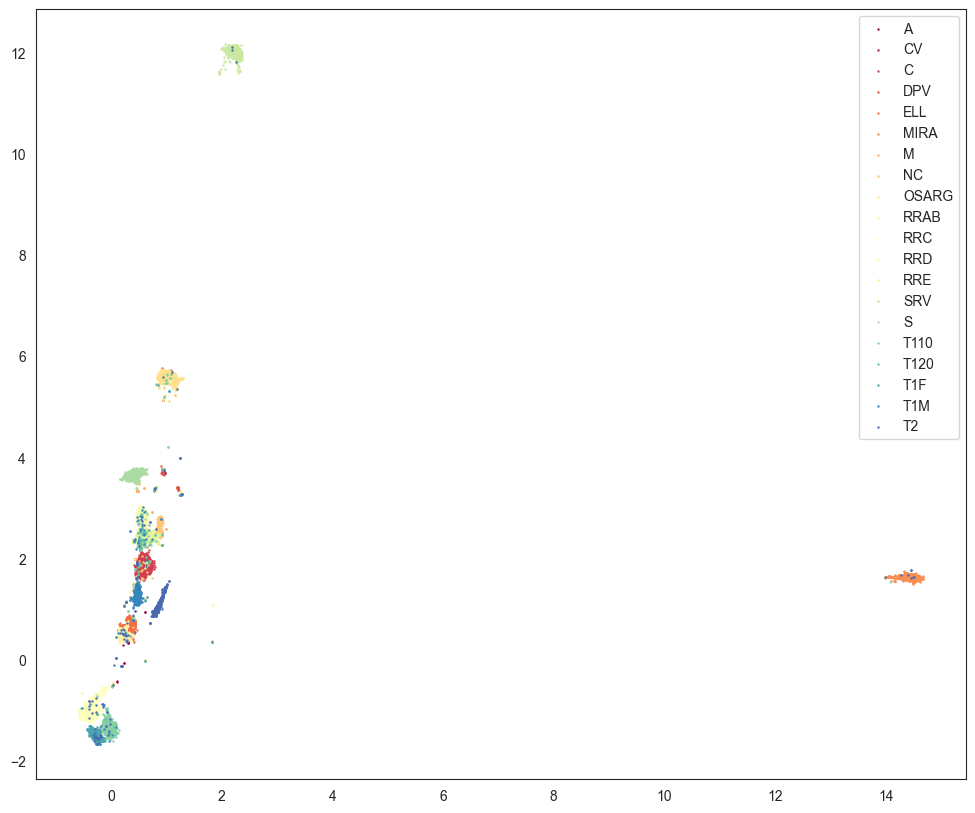

In [ ]:
scatter_data_2d(combine_embedding, class_name, index)


In [12]:
import hdbscan
import numpy as np

# 创建HDBSCAN对象并进行聚类
print(combine_embedding.shape)
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,min_samples=5)
cluster_labels = clusterer.fit_predict(combine_embedding)

# 打印每个数据点的聚类标签
print(cluster_labels)

NameError: name 'combine_embedding' is not defined

In [11]:
reducer_visual = umap.UMAP(n_components=2, min_dist=0, n_neighbors=15)
embedding_visual = reducer_visual.fit_transform(combine_data,y=labels)


ValueError: Length of x = 19661, length of y = 188528, while it must be equal.

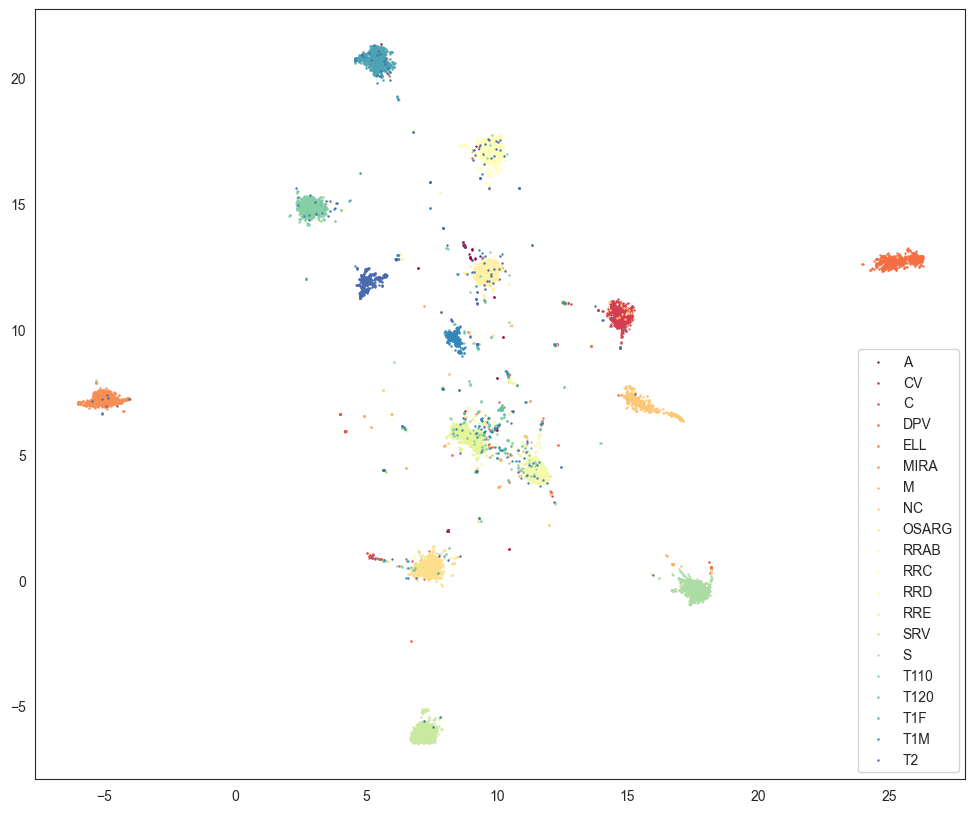

In [ ]:
cluster_labels.shape
scatter_data_2d(embedding_visual, class_name, index)

Counter({12: 1551, 9: 1524, 6: 1520, 3: 1512, 11: 1504, 1: 1500, 16: 1483, 2: 1471, 5: 1439, 14: 1341, 0: 1328, 7: 1288, 15: 601, 8: 487, 18: 374, 17: 254, -1: 242, 4: 114, 13: 70, 10: 58})


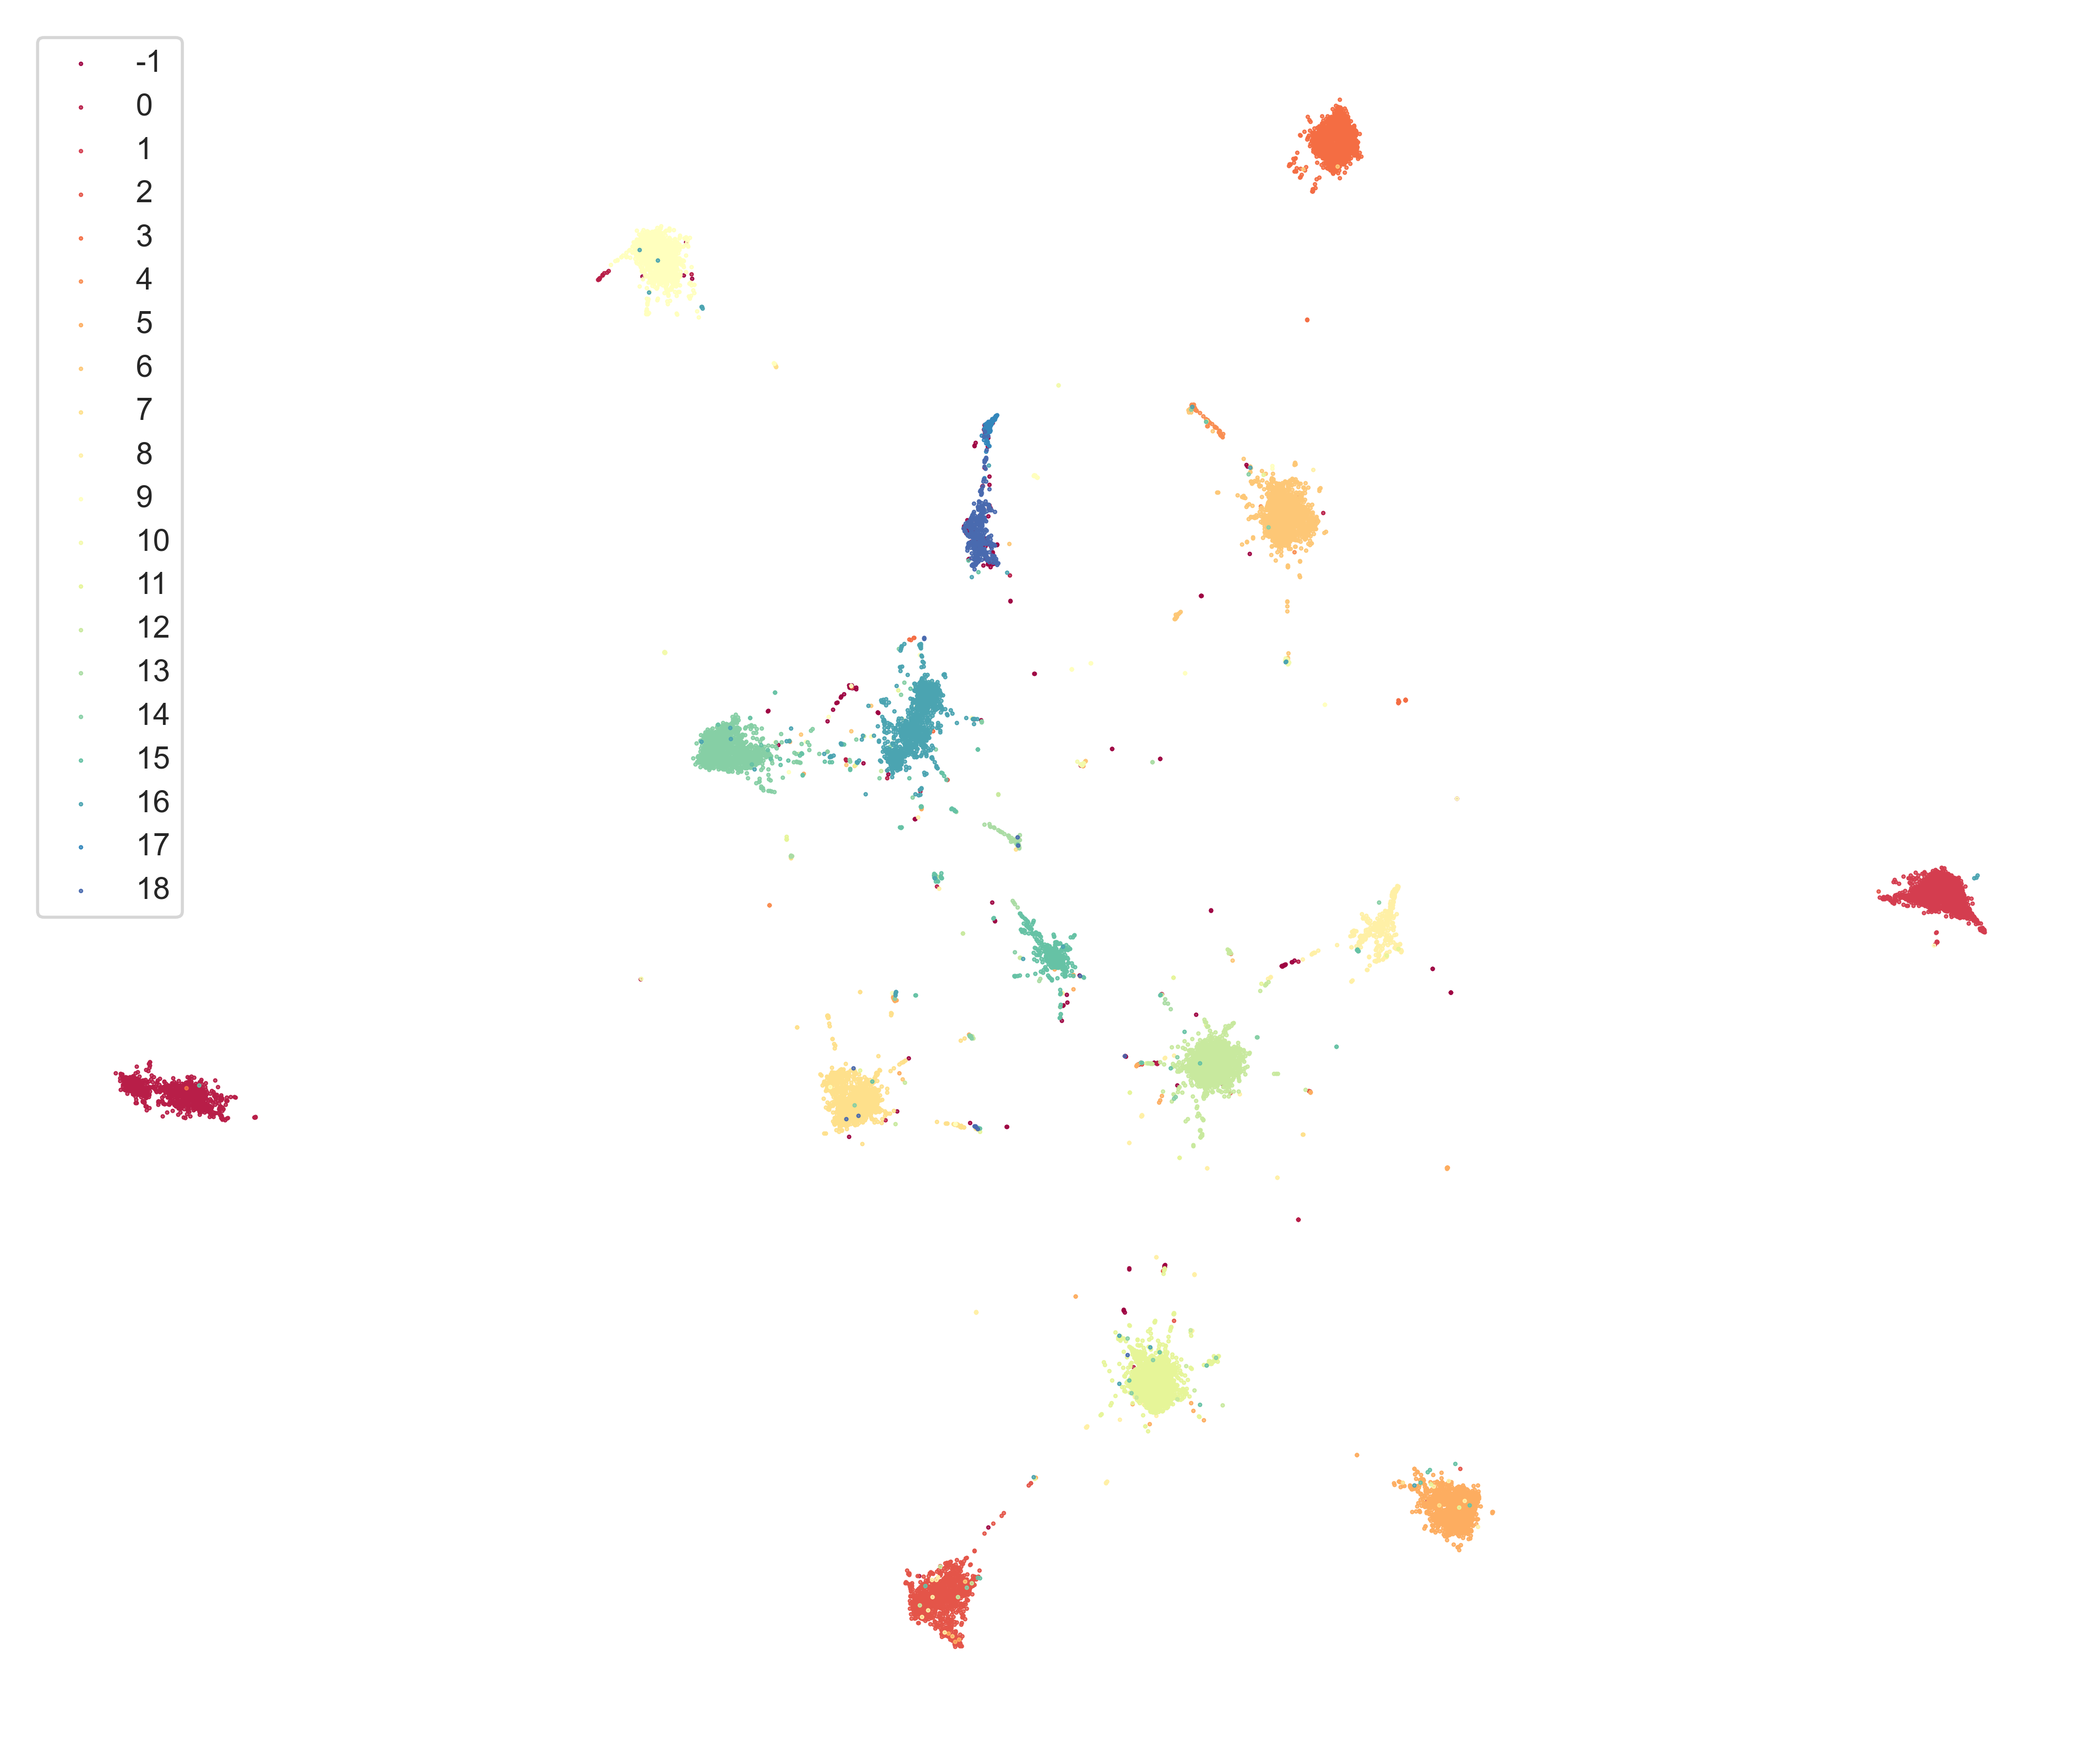

In [ ]:
#对每个类别进行计数
import matplotlib.patches as mpatches
from collections import Counter
print(Counter(cluster_labels))

#对预测标签画图
sns.color_palette("Spectral", as_cmap=True)
def scatter_data_2d_hbd(data,labels):
    num = np.unique(labels)
    fig , ax = plt.subplots(figsize=(12,10),dpi=400)
    squares = []
    for i in range (len(num)):
        index = np.where(labels==num[i])
        colors = sns.color_palette("Spectral", as_cmap=True)((i)/len(num))
        #colors = sns.color_palette("husl", 9)
        ax.scatter(data[index,0],data[index,1],s=0.2,label=num[i],color=colors)
        #color = 
        #square = mpatches.Rectangle((0, 0), 1, 1)
        #ax.legend(handles=squares,labels=num)
        #square.set_facecolor(sns.color_palette("Spectral", as_cmap=True)(i/len(num)))
        #squares.append(square)
        #ax.legend(handles=squares,labels=num) 
    ax.legend(handles=squares,labels=num)
    sns.despine(left=True, right=True, top=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.show()

scatter_data_2d_hbd(embedding_visual,cluster_labels)

In [ ]:
import seaborn as sns
sns.set_style("white")
def scatter_all(data,labels,class_name,cluster_labels):

    fig, axes = plt.subplots(4, 5, figsize=(15, 10),dpi=400)
    for i in range(len(class_name)):
        j = np.mod(i,5)
        row = int(i/5)
        index  = np.where(labels==i) 
        sns_emb = pd.DataFrame(data,columns=['x','y'])
        sns_emb['cluster'] = cluster_labels
        sns_emb['True_label'] = labels

        sns_emb_sub = pd.DataFrame(data[index],columns=['x','y'])
        sns_emb_sub['cluster'] = cluster_labels[index]
        sns_emb_sub['True_label'] = labels[index]
        # axes[].scatterplot(x='x',y='y',data=sns_emb,s=2,color='grey')
        # axes.scatterplot(x='x',y='y',hue='cluster',data=sns_emb_sub,s=3,palette='Set1')
        sns.scatterplot(x='x',y='y',data=sns_emb,s=1,color='grey',ax=axes[row,j],legend=False)
        sns.scatterplot(x='x',y='y',data=sns_emb_sub,s=1,ax=axes[row,j],
                        legend=False,c = "red")
        sns.despine(left=True, right=True, top=True, bottom=True)
        axes[row,j].set_title(class_name[i])
        axes[row,j].set_xticks([])
        axes[row,j].set_yticks([])
        axes[row,j].set_xlabel('')
        axes[row,j].set_ylabel('')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()

scatter_all(embedding_visual,labels,class_name,cluster_labels)

NameError: name 'embedding_visual' is not defined

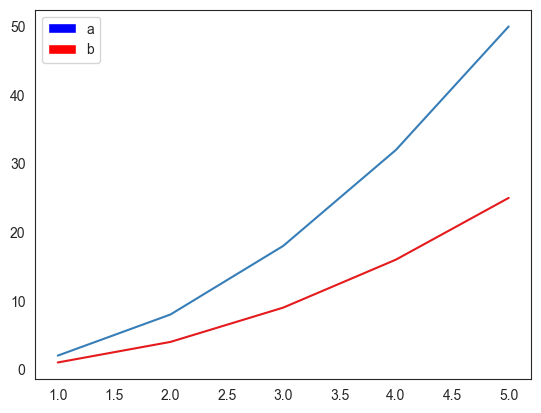

In [ ]:
fig, ax = plt.subplots()

# 绘制一些示例数据
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
ax.plot(x, y, label='线条')
ax.plot(x, np.array(y) * 2, label='另一个线条')

# 创建一个方块形状的对象
square = mpatches.Rectangle((0, 0), 1, 1, fc="r")
square2 = mpatches.Rectangle((0, 0), 1, 1, fc="b")

# 添加图例，并将图例设为方块形状
ax.legend(handles=[square2,square], labels=['a','b'])

# 显示图表
plt.show()